## 1.Import required libraries and Google Drive




In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## 2.Import the needed files from Google Drive Storage convert these files into a numpy arrays data set with the two data set data frame from male data frame female

In [ ]:
df_male = np.genfromtxt( "/content/drive/My Drive/Corizo/nhanes_adult_male_bmx_2020.csv", delimiter=',')
df_female = np.genfromtxt("/content/drive/My Drive/Corizo/nhanes_adult_female_bmx_2020.csv", delimiter=',')

In [ ]:
print("Male Matrix:\n", df_male[:5])
print("Female Matrix:\n", df_female[:5])


Male Matrix:
 [[  nan   nan   nan   nan   nan   nan   nan]
 [ 98.8 182.3  42.   40.1  38.2 108.2 120.4]
 [ 74.3 184.2  41.1  41.   30.2  94.5  86.8]
 [103.7 185.3  47.   44.   32.  107.8 109.6]
 [ 86.  167.8  39.5  38.4  29.  106.4 108.3]]
Female Matrix:
 [[  nan   nan   nan   nan   nan   nan   nan]
 [ 97.1 160.2  34.7  40.8  35.8 126.1 117.9]
 [ 91.1 152.7  33.5  33.   38.5 125.5 103.1]
 [ 73.  161.2  37.4  38.   31.8 106.2  92. ]
 [ 61.7 157.4  38.   34.7  29.  101.   90.5]]


## Identify the nan values and remove the nonvalues with Numpy using any axis equal to one (Data Preprocessing)

In [ ]:
df_female = df_female[~np.isnan(df_female).any(axis=1)]
prin4t(df_female[⁴:5])
df_male = df_male[~np.isnan(df_male).any(axis=1)]
print(df_male[:5])

[[ 97.1 160.2  34.7  40.8  35.8 126.1 117.9]
 [ 91.1 152.7  33.5  33.   38.5 125.5 103.1]
 [ 73.  161.2  37.4  38.   31.8 106.2  92. ]
 [ 61.7 157.4  38.   34.7  29.  101.   90.5]
 [ 55.4 154.6  34.6  34.   28.3  92.5  73.2]]
[[ 98.8 182.3  42.   40.1  38.2 108.2 120.4]
 [ 74.3 184.2  41.1  41.   30.2  94.5  86.8]
 [103.7 185.3  47.   44.   32.  107.8 109.6]
 [ 86.  167.8  39.5  38.4  29.  106.4 108.3]
 [ 99.4 181.6  40.4  39.9  36.  120.2 107. ]]


## Now sliced the first column of the each data set male and female because the each first column contained the weight of each male and female And now identify the shape and size of the both male and female weight

In [ ]:
female_weights = df_female[:, 0]
male_weights = df_male[:, 0]

print("Female Weights:\n", female_weights[:5])
print("Male Weights:\n", male_weights[:5])

Female Weights:
 [97.1 91.1 73.  61.7 55.4]
Male Weights:
 [ 98.8  74.3 103.7  86.   99.4]


## 3.Using MatplotLib histogram analyzed the female weight and male weight Using histogram virtualization method and set the figure of the axis

In [ ]:
plt.figure(figsize=(10, 8))

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

Text(42.722222222222214, 0.5, 'Frequency')

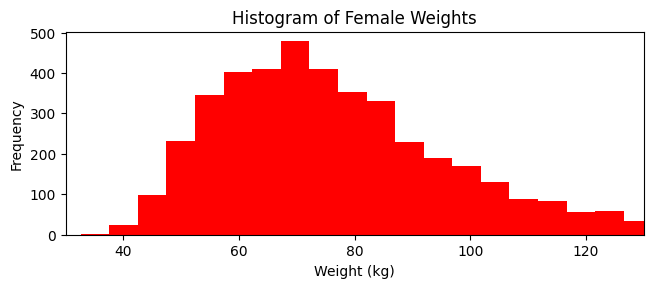

In [ ]:
plt.subplot(2, 1, 1)
plt.xlim(30, 130)
plt.tight_layout()
plt.hist(female_weights, bins=30, color='red', alpha=1)
plt.title('Histogram of Female Weights')
plt.xlabel('Weight (kg)')
plt.ylabel('Frequency')

Text(42.722222222222214, 0.5, 'Frequency')

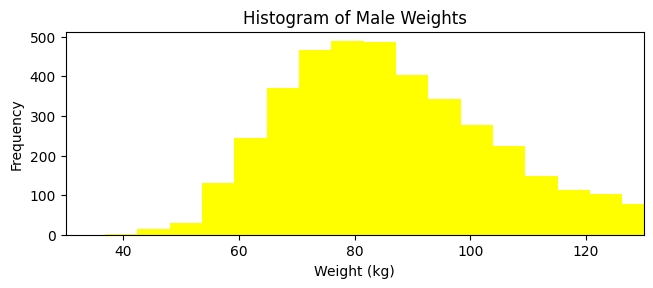

In [ ]:
plt.subplot(2, 1, 2)
plt.xlim(30, 130)
plt.tight_layout()
plt.hist(male_weights, bins=30, color='yellow', alpha=1)
plt.title('Histogram of Male Weights')
plt.xlabel('Weight (kg)')
plt.ylabel('Frequency')

## 4.Compare the male weight and the female weight using box plot in Matplotlib

<ipython-input-28-2c8ad9266cb3>:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([female_weights, male_weights], labels=['Female', 'Male'])


Text(0, 0.5, 'Weight (kg)')

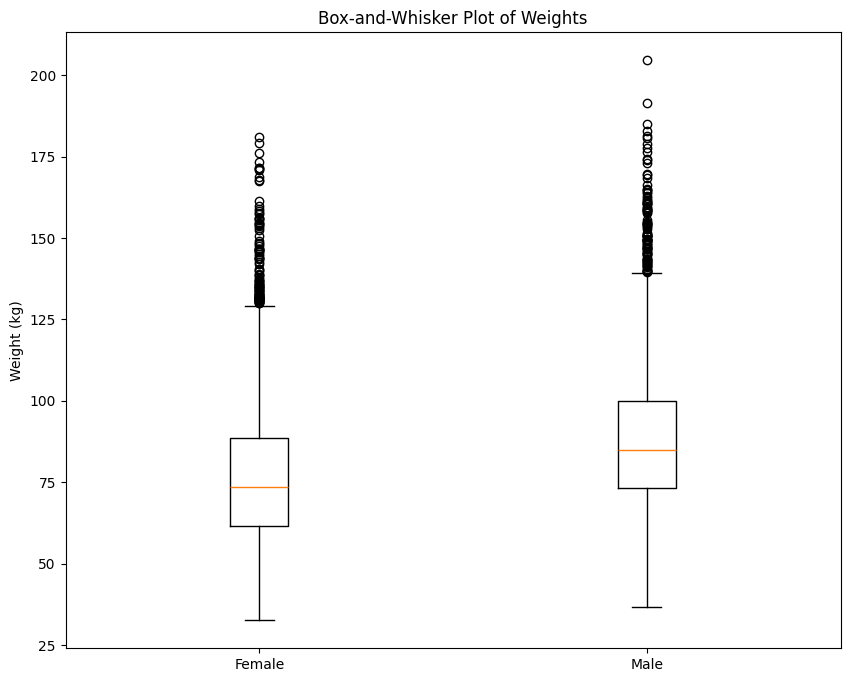

In [ ]:
plt.figure(figsize=(10, 8))
plt.boxplot([female_weights, male_weights], labels=['Female', 'Male'])
plt.title('Box-and-Whisker Plot of Weights')
plt.ylabel('Weight (kg)')
#plt.show()

From the above box plot we can clearly say the man's weight is higher than females weight, The distribution of weights for males is more spread out than that for females

## 5.Build a computer aggregate for the mean,medium,standard deviance,Skewness,Kurtosis

In [ ]:
def compute_aggregates(data):
    return {
        'mean': np.mean(data),
        'median': np.median(data),
        'std_dev': np.std(data),
        'variance': np.var(data),
        'skewness': stats.skew(data),
        'kurtosis': stats.kurtosis(data)
    }

female_aggregates = compute_aggregates(female_weights)
male_aggregates = compute_aggregates(male_weights)

print("Female Weights Aggregates:\n", female_aggregates)
print("Male Weights Aggregates:\n", male_aggregates)


Female Weights Aggregates:
 {'mean': 77.40379057095475, 'median': 73.6, 'std_dev': 21.54250829019315, 'variance': 464.07966343304065, 'skewness': 1.03336107186799, 'kurtosis': 1.4009683480659731}
Male Weights Aggregates:
 {'mean': 88.36454300416565, 'median': 85.0, 'std_dev': 21.418936717962495, 'variance': 458.770850128082, 'skewness': 0.9842810741662347, 'kurtosis': 1.4742884754078238}


From the aggregation the mean of the male aggregation is higher than female mean aggregation and  median standard deviation skewness and courtesies have almost similar values

## 6.To add the 8th column in female matrix as a BMI (body Mass indexes) , Which is calculated with weight and height By calculating the weight and the height of the body we can easily find the BMI

In [ ]:
def calculate_bmi(weight, height_cm):
    height_m = height_cm / 100
    return weight / (height_m ** 2)

female_bmi = calculate_bmi(df_female[:, 0], df_female[:, 1])
df_female = np.column_stack((df_female, female_bmi))
print("Female Matrix with BMI:\n", df_female[:5])

Female Matrix with BMI:
 [[ 97.1        160.2         34.7         40.8         35.8
  126.1        117.9         37.83504078  37.83504078]
 [ 91.1        152.7         33.5         33.          38.5
  125.5        103.1         39.06972037  39.06972037]
 [ 73.         161.2         37.4         38.          31.8
  106.2         92.          28.09265496  28.09265496]
 [ 61.7        157.4         38.          34.7         29.
  101.          90.5         24.90437849  24.90437849]
 [ 55.4        154.6         34.6         34.          28.3
   92.5         73.2         23.17879132  23.17879132]]


## 7. The process of finding Z score for Every variable in female matrix using Scypi Library

In [ ]:
female_standardized = stats.zscore(df_female, axis=0)
print("Standardized Female Matrix:\n", female_standardized[:5])

Standardized Female Matrix:
 [[ 0.91429508  0.00895038 -0.56739463  1.13298804  0.55084546  1.08316157
   1.11578462  0.9969677 ]
 [ 0.63577599 -1.05306843 -1.07893145 -1.29349161  1.03221804  1.04475528
   0.265089    1.15617483]
 [-0.2044233   0.15055289  0.5835632   0.26194406 -0.1622991  -0.19064688
  -0.37293272 -0.25927501]
 [-0.7289676  -0.38753664  0.83933161 -0.76464348 -0.66150029 -0.52350135
  -0.45915188 -0.67039085]
 [-1.02141265 -0.78402366 -0.6100227  -0.98240447 -0.78630059 -1.06759039
  -1.45354609 -0.89289859]]


## 8. Create a pair plot With the female matrix as the circumstance in female standardized Z scores with the seaborn Library SNS

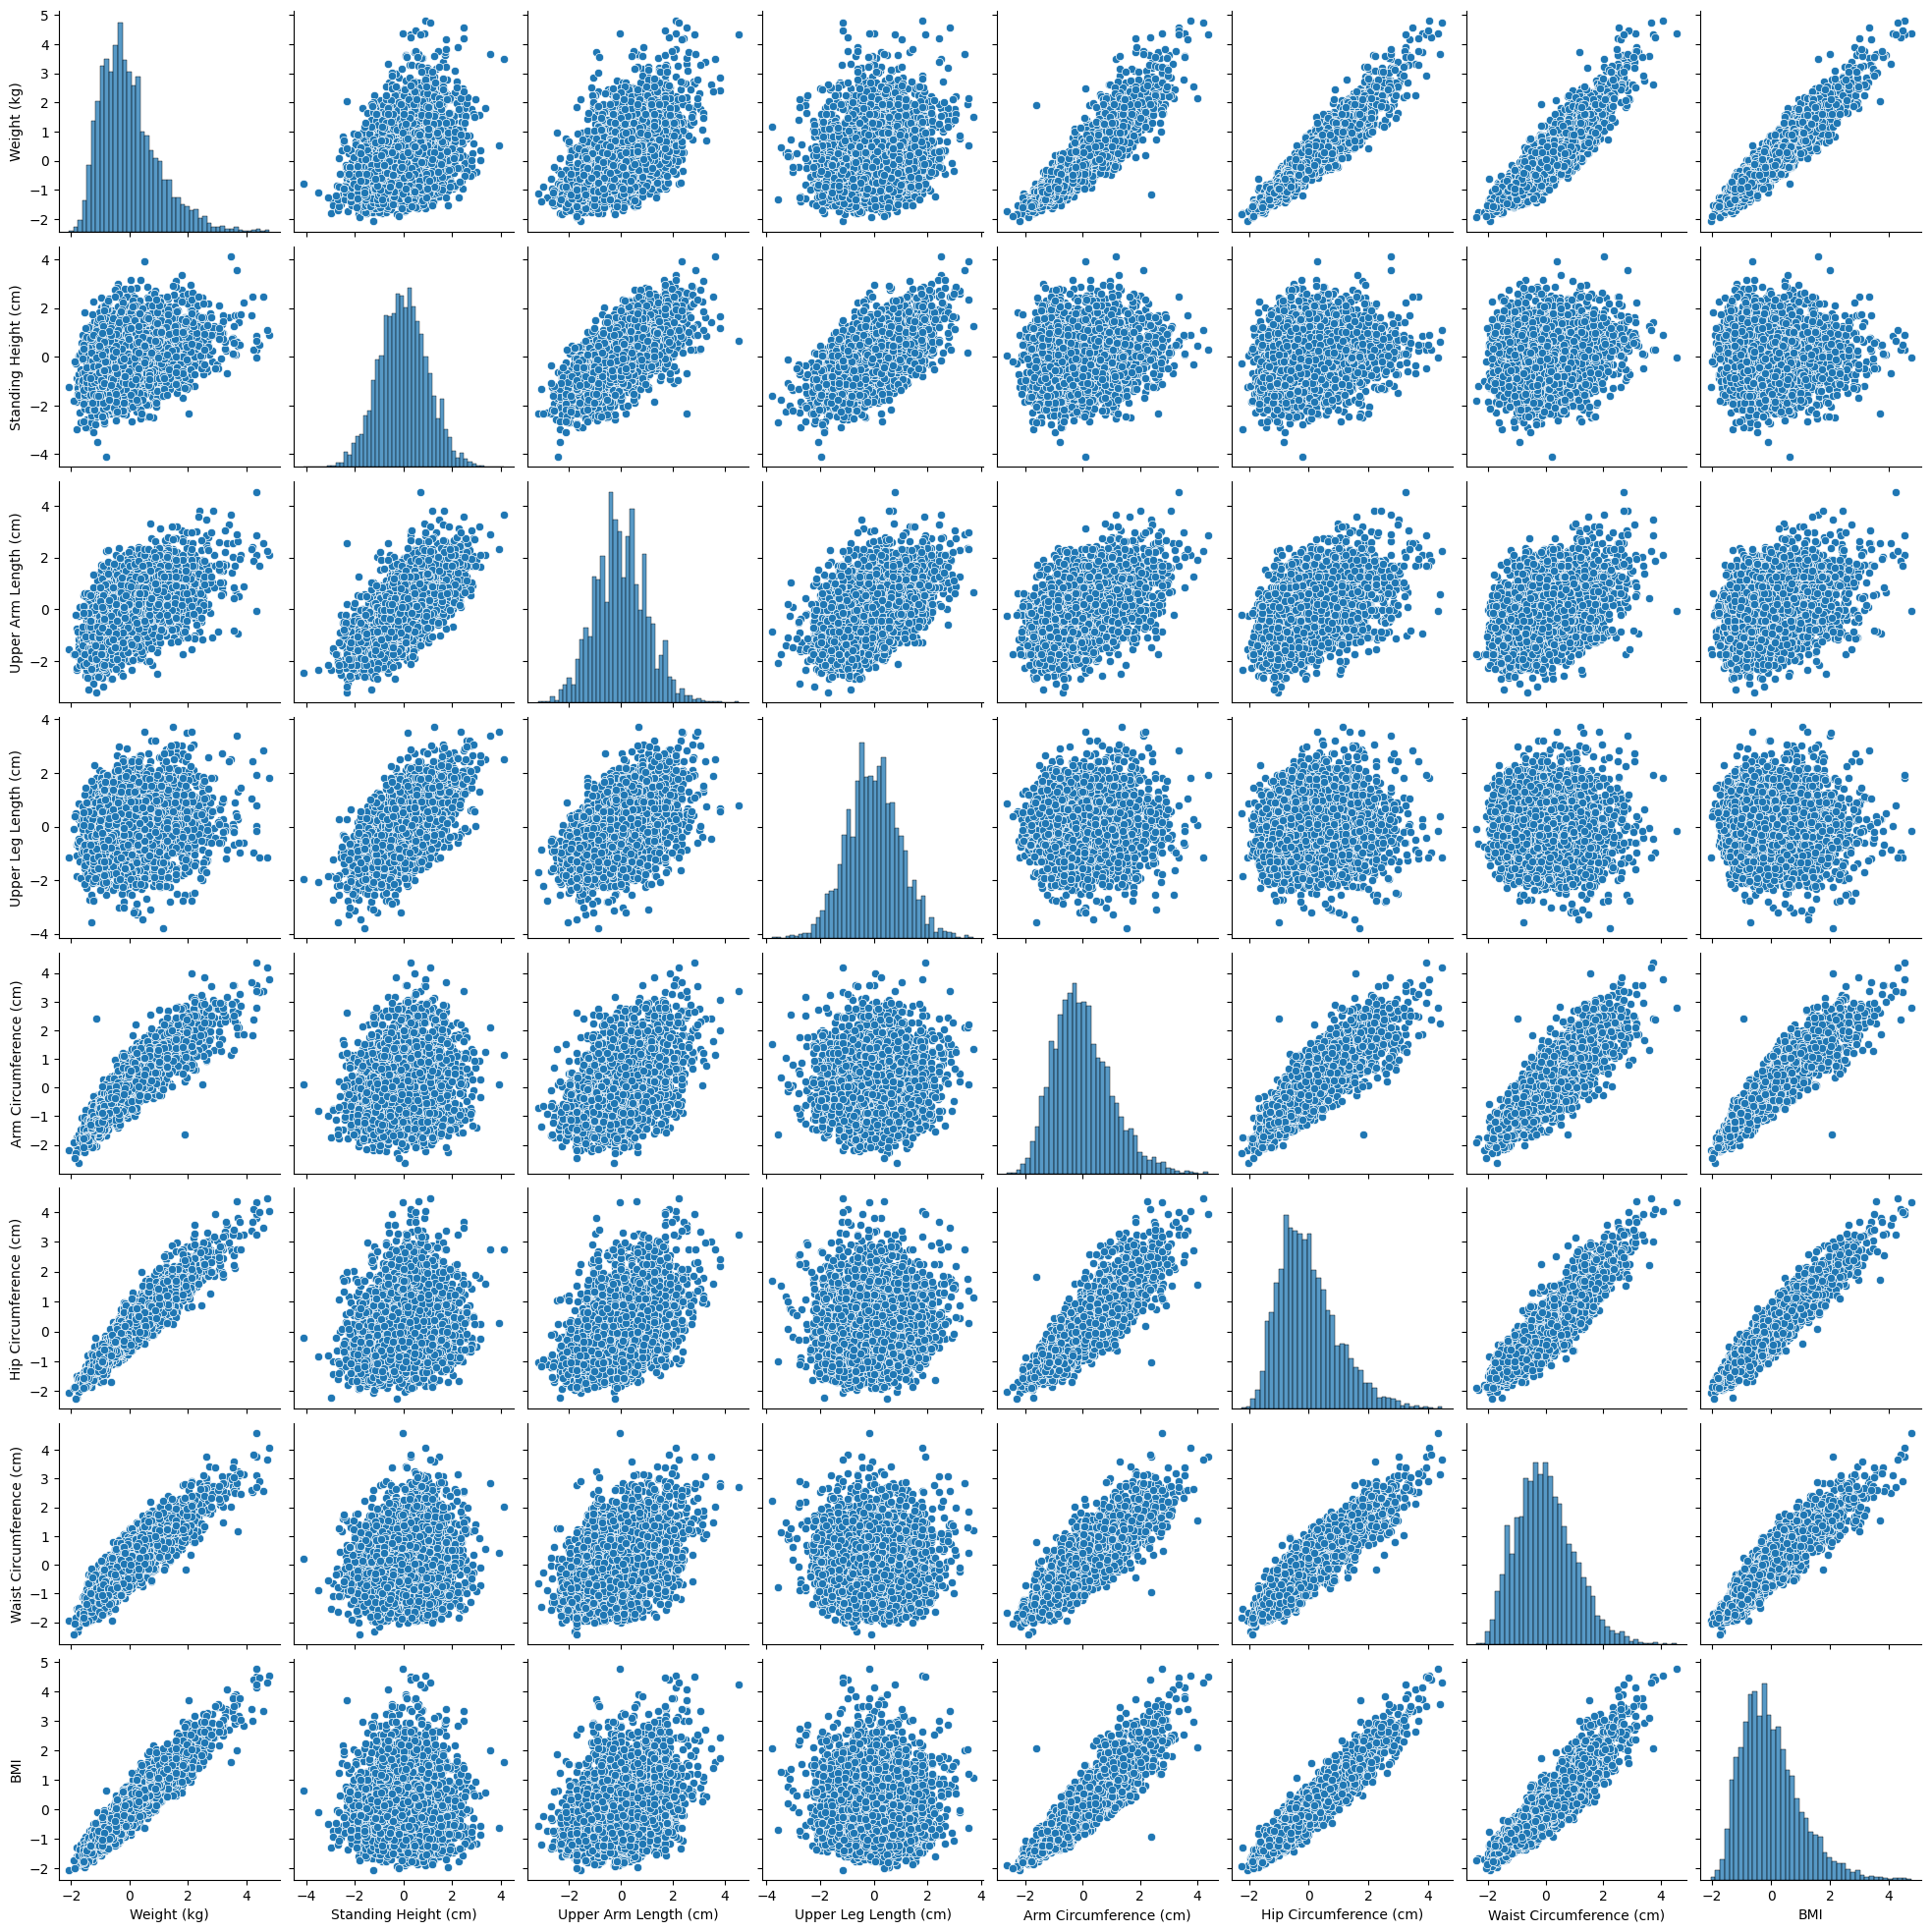

In [ ]:
sns.pairplot(pd.DataFrame(female_standardized, columns=[
    'Weight (kg)', 'Standing Height (cm)', 'Upper Arm Length (cm)',
    'Upper Leg Length (cm)', 'Arm Circumference (cm)', 'Hip Circumference (cm)',
    'Waist Circumference (cm)', 'BMI'
]))
plt.show()

 Pearson and Spearman’s correlation coefficients for all pairs of variables

- The original code calculated correlations using indices 0, 1, 6, 5, and 7.
- The dataset `female_standardized` contained 7 columns, with indices ranging from 0 to 6.
- Index 7 was out of bounds; the intended columns were 'Weight (kg)', 'Standing Height (cm)', 'Waist Circumference (cm)', 'Hip Circumference (cm)', and likely 'BMI'.
- The update corrected the indices to correctly reference hip and waist circumference using indices 4 and 5, replacing the erroneous indices 5 and 7.
- It is suggested that column 7 represents BMI based on previous code references.

In [ ]:
def compute_correlations(data):

    df = pd.DataFrame(data)
    pearson_corr = df.corr(method='pearson')
    spearman_corr = df.corr(method='spearman')

    return pearson_corr, spearman_corr

In [ ]:
pearson_corr, spearman_corr = compute_correlations(female_standardized)

print("Pearson Correlation Coefficients:\n", pearson_corr)
print("Spearman Correlation Coefficients:\n", spearman_corr)

Pearson Correlation Coefficients:
           0         1         2         3         4         5         6  \
0  1.000000  0.345496  0.551563  0.193186  0.905385  0.946553  0.904550   
1  0.345496  1.000000  0.667911  0.657202  0.151955  0.202895  0.126547   
2  0.551563  0.667911  1.000000  0.475645  0.453122  0.459400  0.427893   
3  0.193186  0.657202  0.475645  1.000000  0.079876  0.100268 -0.034803   
4  0.905385  0.151955  0.453122  0.079876  1.000000  0.868063  0.845065   
5  0.946553  0.202895  0.459400  0.100268  0.868063  1.000000  0.897407   
6  0.904550  0.126547  0.427893 -0.034803  0.845065  0.897407  1.000000   
7  0.945900  0.033077  0.364660 -0.014819  0.915388  0.944199  0.921198   

          7  
0  0.945900  
1  0.033077  
2  0.364660  
3 -0.014819  
4  0.915388  
5  0.944199  
6  0.921198  
7  1.000000  
Spearman Correlation Coefficients:
           0         1         2         3         4         5         6  \
0  1.000000  0.338860  0.541501  0.195821  0.913913 

## 9.Compute the waist circumference to height ratio and the waist circumference to hip circumference ratio of the male and female participants by adding two more columns to the males and females matrices

In [ ]:


waist_to_height_ratio_male = df_male[:, 6] / df_male[:, 1]
waist_to_hip_ratio_male = df_male[:, 6] / df_male[:, 5]
df_male = np.column_stack((df_male, waist_to_height_ratio_male, waist_to_hip_ratio_male))

waist_to_height_ratio_female = df_female[:, 6] / df_female[:, 1]
waist_to_hip_ratio_female = df_female[:, 6] / df_female[:, 5]
df_female = np.column_stack((df_female, waist_to_height_ratio_female, waist_to_hip_ratio_female))


print("Male Matrix with Ratios:\n", df_male[:5])
print("Female Matrix with Ratios:\n", df_female[:5])


Male Matrix with Ratios:
 [[ 98.8        182.3         42.          40.1         38.2
  108.2        120.4          0.66044981   1.11275416]
 [ 74.3        184.2         41.1         41.          30.2
   94.5         86.8          0.47122693   0.91851852]
 [103.7        185.3         47.          44.          32.
  107.8        109.6          0.59147329   1.01669759]
 [ 86.         167.8         39.5         38.4         29.
  106.4        108.3          0.6454112    1.01785714]
 [ 99.4        181.6         40.4         39.9         36.
  120.2        107.           0.58920705   0.89018303]]
Female Matrix with Ratios:
 [[ 97.1        160.2         34.7         40.8         35.8
  126.1        117.9          0.73595506   0.93497224]
 [ 91.1        152.7         33.5         33.          38.5
  125.5        103.1          0.67518009   0.82151394]
 [ 73.         161.2         37.4         38.          31.8
  106.2         92.           0.5707196    0.86629002]
 [ 61.7        157.4        

The data of male Matrix with ratio and female matrix with ratio is verified

##10. To draw a box-and-whisker plot with four boxes side by side, comparing the distribution of the waistto-height ratio and the waist-to-hip ratio of both male and female participants.



<ipython-input-42-8800001d8c17>:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df_male[:, -2], df_male[:, -1], df_female[:, -2], df_female[:, -1]],


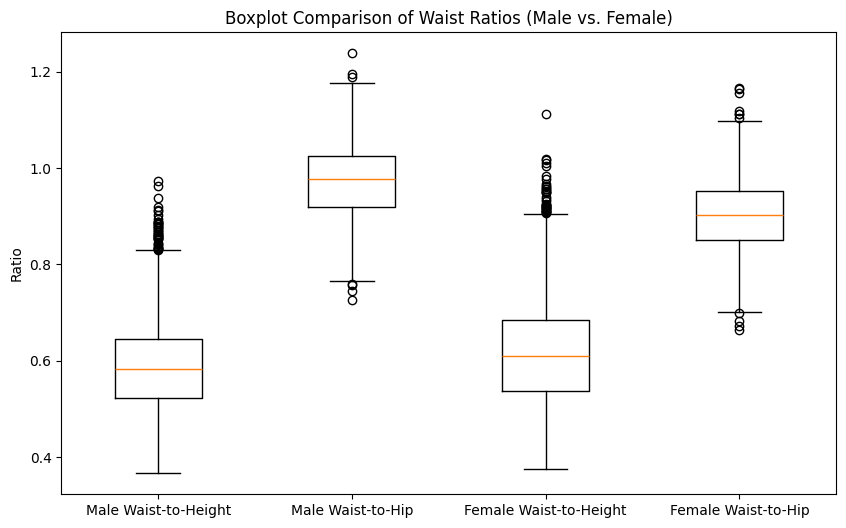

In [ ]:
plt.figure(figsize=(10, 6))
plt.boxplot([df_male[:, -2], df_male[:, -1], df_female[:, -2], df_female[:, -1]],
            labels=['Male Waist-to-Height', 'Male Waist-to-Hip', 'Female Waist-to-Height', 'Female Waist-to-Hip'])
plt.title('Boxplot Comparison of Waist Ratios (Male vs. Female)')
plt.ylabel('Ratio')
plt.show()


## 11.The Body Mass Index:



Pros:

A straightforward, widely used method for the assessment of weight status with reference to height and weight.
Simple to calculate and interpret using standard categories; underweight, normal, overweight, and obese.
Generally correlating to fat and health risks.
Disadvantages:

Does not separate lean body weight and body fat. Therefore, an athlete or a muscular individual would have a high BMI score although healthy.
Not necessarily accurate for the body fat distribution, which is very important for health risk appraisal.
May not be appropriate for certain populations, such as pregnant women, elderly people, or ill persons.

Waist-to-height ratio (WHtR):

Merits:

Factoring in the central obesity classification, which is a significant risk factor for chronic diseases, it measures the anthropometric characteristic ratio of an individual's ratio between waist and height.
Simply comparing two values is all that is required.
Might be a better predictor of health risks than BMI, especially in case of cardiovascular diseases.

Demerits:

It might be lesser known as compared to BMI to health professionals.
Measurement of waist circumference may find subjective error and thus, again depending on an individual for accuracy.
May not apply to every population like children and short or tall individuals.

Waist-to-hip ratio (WHR):

Advantages:

Reflects the tissue distribution and body shape with android or gynoid body-types.
Easy calculations with waist and hip measurements.
Could be a good predictor of risk for health problems related to the cardiovascular and metabolic types.

Disadvantages:

Less accurate for very high or low BMI ranges.
Measurement of hip circumference is always problematic and can be positioned by State worn on the body or body posture.
Not as frequently used or well understood as BMI.

## 12.Print out the standardised body measurements for the 5 persons with the lowest BMIand the 5 persons with the 5 highest BMI

In [ ]:
sorted_indices = np.argsort(female[:, -1])
lowest_bmi_indices = sorted_indices[:5]

highest_bmi_indices = sorted_indices[-5:]
selected_indices = np.concatenate((lowest_bmi_indices, highest_bmi_indices))

print("Standardized Body Measurements for the 5 Lowest and 5 Highest BMIs:")
female_standardized[selected_indices].round(2)




NameError: name 'female' is not defined

The output will be z-scores for the 10 selected individuals regarding weight, height as well as other body measurements. A z-score shows how distant a data point is away from the mean in terms of standard deviations and positive z-scores indicate that value is above the mean while negative values indicate below it. Thus, measurements can be compared within different measures, say weight with height since they are now measured in the same units of standard deviations. When the z-scores are compared between the lowest and the highest BMI groups, we may see different patterns that suggest the measurements of the body associated with high or low extreme BMI values. High-bMI people might have higher z-scores also in weight and waist circumference for the height.